In [65]:
#Importing pandas and numpy libraries to load Dataset
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('ad_salesproject.csv')

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
#checking the number of rows and coumns in dataset
df.shape

(200, 5)

In [6]:
# checking datatypes in df
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [12]:
#Statistical summary of dataset
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
#checking Correlation
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [14]:
#Importing seaborn and matplotlib.pyplot for data Visuaisation
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

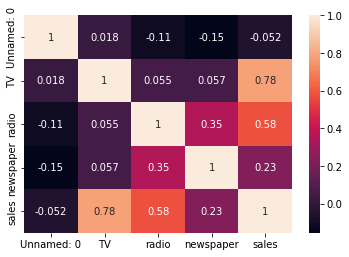

In [11]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='sales', ylabel='Count'>

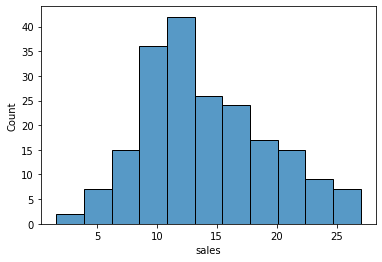

In [12]:
sns.histplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Count'>

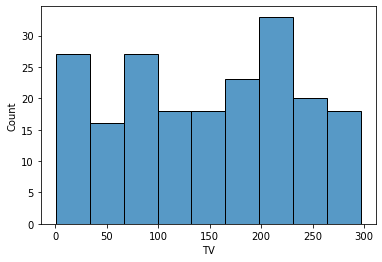

In [13]:
sns.histplot(df['TV'])

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

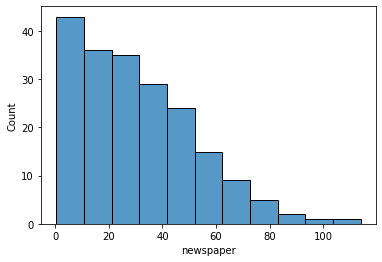

In [14]:
sns.histplot(df['newspaper'])

C:\Users\DANISH GAZI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

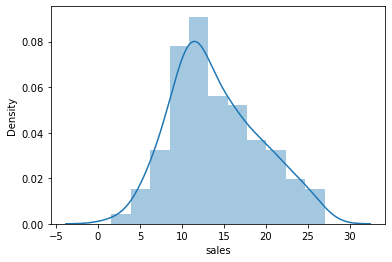

In [15]:
sns.distplot(df['sales'])

C:\Users\DANISH GAZI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

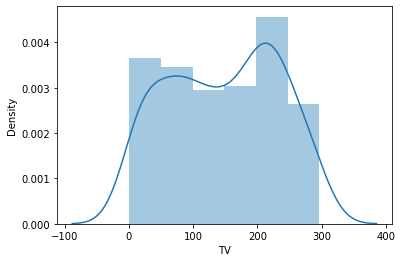

In [16]:
sns.distplot(df['TV'])

C:\Users\DANISH GAZI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

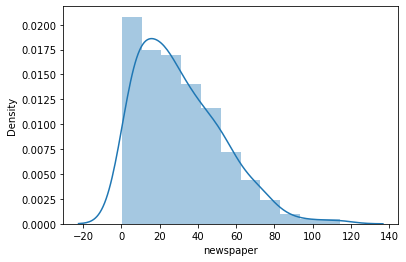

In [17]:
sns.distplot(df['newspaper'])

In [15]:
# Seperating features and target or label
x=df.iloc[:,1:4]

In [16]:
y=df.iloc[:,-1]

In [20]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
#Checking Multicoliniarity
def cal_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [22]:
cal_vif(x)

,variables,VIF
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [18]:
#Checking Skewness
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Applying sacaling on x
st=StandardScaler()
x=st.fit_transform(x)

In [22]:
x=pd.DataFrame(x)

<AxesSubplot:>

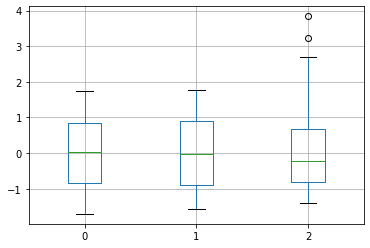

In [24]:
# Checking outliers through visualization
x.boxplot()

In [25]:
# Removing outliers
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(x))

In [27]:
z

,0,1,2
0,0.969852,0.981522,1.778945
1,1.197376,1.082808,0.669579
2,1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,0.841614,1.281802
...,...,...,...
195,1.270941,1.321031,0.771217
196,0.617035,1.240003,1.033598
197,0.349810,0.942899,1.111852
198,1.594565,1.265121,1.640850


In [28]:
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [29]:
y.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [30]:
x.shape

(200, 3)

In [31]:
y.shape

(200,)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
#Since we have continious data so using linear regression model first
ln=LinearRegression()

In [35]:
#Checking for the best random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    ln.fit(x_train,y_train)
    train_pred=ln.predict(x_train)
    y_pred=ln.predict(x_test)
    print('The test accuracy is ',r2_score(y_test,y_pred)*100,' for random state ',i)
    print('The train accuracy is ',r2_score(y_train,train_pred)*100,' for random state ',i)
    print('\n')

The test accuracy is  86.49018906637791  for random state  0
The train accuracy is  90.65727532450596  for random state  0


The test accuracy is  92.24605706201436  for random state  1
The train accuracy is  88.50053786777521  for random state  1


The test accuracy is  80.41157295965823  for random state  2
The train accuracy is  92.94705638285602  for random state  2


The test accuracy is  87.60893953712909  for random state  3
The train accuracy is  90.46393841056695  for random state  3


The test accuracy is  91.27220729596172  for random state  4
The train accuracy is  88.90066696510229  for random state  4


The test accuracy is  88.68821951328665  for random state  5
The train accuracy is  89.97682984995001  for random state  5


The test accuracy is  85.98585513768164  for random state  6
The train accuracy is  90.7242024188774  for random state  6


The test accuracy is  88.94586465158204  for random state  7
The train accuracy is  89.70470429900155  for random state  7


T

In [36]:
# Since 13 is our best random state so proceding further with this random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
ln.fit(x_train,y_train)
train_pred=ln.predict(x_train)
y_pred=ln.predict(x_test)
test_accuracy=r2_score(y_test,y_pred)*100
train_accuracy=r2_score(y_train,train_pred)*100

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
#Checking best value of cv for cross validation
for i in range(2,10):
    cv_score=cross_val_score(ln,x,y,cv=i)
    cv_mean=cv_score.mean()
    print('At cv value ',i,' we are grtting cross val score as ',cv_mean*100,' training accuracy as ',train_accuracy,' and testing accuracy as ',test_accuracy)
    print("\n")

At cv value  2  we are grtting cross val score as  89.08473589845056  training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


At cv value  3  we are grtting cross val score as  89.16464591145558  training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


At cv value  4  we are grtting cross val score as  89.00070660549505  training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


At cv value  5  we are grtting cross val score as  88.71063495438435  training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


At cv value  6  we are grtting cross val score as  88.99208882186672  training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


At cv value  7  we are grtting cross val score as  88.59930219823539  training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


At cv value  8  we are grtting cross val score as  88.26686689919153  

In [40]:
# 3 is the best cv so proceding futher with it
cv_score=cross_val_score(ln,x,y,cv=3)
cv_mean=cv_score.mean()
print('At cv value 3 we are grtting cross val score as ',cv_mean*100,' and training accuracy as ',train_accuracy,' and testing accuracy as ',test_accuracy)

At cv value 3 we are grtting cross val score as  89.16464591145558  and training accuracy as  87.61514926449973  and testing accuracy as  93.3219070930032


In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [42]:
# Applying Lasso regression along with its best parameters using GridsearchCV
ls=Lasso()
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gscv=GridSearchCV(ls,parameter)
gscv.fit(x_train,y_train)
print(gscv.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [43]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
predy=ls.predict(x_test)
lsacc=r2_score(y_test,predy)*100
print('Accuracy score of lasso is ',r2_score(y_test,predy)*100)

Accuracy score of lasso is  93.34971957533239


In [44]:
#Cross validating score for Lasso
for i in range(2,10):
    cvl=cross_val_score(ls,x,y,cv=i)
    cvl_mean=cvl.mean()
    print('cross val score at ',i,' is ',cvl_mean*100,' with Lasso accuracy ',r2_score(y_test,predy)*100)

cross val score at  2  is  89.22626848420668  with Lasso accuracy  93.34971957533239
cross val score at  3  is  89.20515650908781  with Lasso accuracy  93.34971957533239
cross val score at  4  is  89.07019896473227  with Lasso accuracy  93.34971957533239
cross val score at  5  is  88.85933789305031  with Lasso accuracy  93.34971957533239
cross val score at  6  is  89.01571732351755  with Lasso accuracy  93.34971957533239
cross val score at  7  is  88.6813710238167  with Lasso accuracy  93.34971957533239
cross val score at  8  is  88.38480693745079  with Lasso accuracy  93.34971957533239
cross val score at  9  is  88.32392451912233  with Lasso accuracy  93.34971957533239


In [45]:
cvl=cross_val_score(ls,x,y,cv=2)
cvl_mean=cvl.mean()
print('cross val score at 2 is ',cvl_mean*100,' with Lasso accuracy ',r2_score(y_test,predy)*100)

cross val score at 2 is  89.22626848420668  with Lasso accuracy  93.34971957533239


In [48]:
from sklearn.linear_model import Ridge

In [49]:
rg=Ridge()

In [50]:
# Using Ridge regression model along with its best parameters using GridsearchCV
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gsrg=GridSearchCV(rg,parameter)
gsrg.fit(x_train,y_train)
print(gsrg.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [51]:
rg=Ridge(alpha=0.1,random_state=0)
rg.fit(x_train,y_train)
predyrg=rg.predict(x_test)
rgacc=r2_score(y_test,predyrg)*100
print('Accuracy score of Ridge is ',r2_score(y_test,predyrg)*100)

Accuracy score of Ridge is  93.32568936185733


In [52]:
# Cross validation for ridge with its best cv value
for i in range(2,10):
    cvrg=cross_val_score(rg,x,y,cv=i)
    cvrg_mean=cvrg.mean()
    print('At cv ',i,' the cross val score is ',cvrg_mean*100,' with Ridge accuracy ',r2_score(y_test,predyrg)*100)

At cv  2  the cross val score is  89.08389746792544  with Ridge accuracy  93.32568936185733
At cv  3  the cross val score is  89.1647824368505  with Ridge accuracy  93.32568936185733
At cv  4  the cross val score is  89.00082226509949  with Ridge accuracy  93.32568936185733
At cv  5  the cross val score is  88.71137602531853  with Ridge accuracy  93.32568936185733
At cv  6  the cross val score is  88.99170425649535  with Ridge accuracy  93.32568936185733
At cv  7  the cross val score is  88.59917566368026  with Ridge accuracy  93.32568936185733
At cv  8  the cross val score is  88.26790260251931  with Ridge accuracy  93.32568936185733
At cv  9  the cross val score is  88.22791012288559  with Ridge accuracy  93.32568936185733


In [53]:
cvrg=cross_val_score(rg,x,y,cv=3)
cvrg_mean=cvrg.mean()
print('At cv 3 the cross val score is ',cvrg_mean*100,' with Ridge accuracy ',r2_score(y_test,predyrg)*100)

At cv 3 the cross val score is  89.1647824368505  with Ridge accuracy  93.32568936185733


In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
en=ElasticNet()

In [57]:
#Applying model elasticnet and finding best parameters using GridSearchCV
parameter={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
gsen=GridSearchCV(en,parameter)
gsen.fit(x_train,y_train)
print(gsen.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [58]:
en=ElasticNet(alpha=0.01,random_state=0)
en.fit(x_train,y_train)
predyen=en.predict(x_test)
enacc=r2_score(y_test,predyen)
print('Accuracy score of Elastic Net is ',r2_score(y_test,predyen)*100)

Accuracy score of Elastic Net is  93.35121509781621


In [59]:
# Finding best cv for cross validation of elastic net
for i in range(2,10):
    cven=cross_val_score(en,x,y,cv=i)
    cven_mean=cven.mean()
    print('At cv ',i,' Cross Val Score is ',cven_mean*100,' with ELastic Net accuracy ',enacc*100)

At cv  2  Cross Val Score is  89.09143649697889  with ELastic Net accuracy  93.35121509781621
At cv  3  Cross Val Score is  89.17189935365548  with ELastic Net accuracy  93.35121509781621
At cv  4  Cross Val Score is  89.00730386702637  with ELastic Net accuracy  93.35121509781621
At cv  5  Cross Val Score is  88.72672337108588  with ELastic Net accuracy  93.35121509781621
At cv  6  Cross Val Score is  88.99610388145469  with ELastic Net accuracy  93.35121509781621
At cv  7  Cross Val Score is  88.60786544858819  with ELastic Net accuracy  93.35121509781621
At cv  8  Cross Val Score is  88.28588653630284  with ELastic Net accuracy  93.35121509781621
At cv  9  Cross Val Score is  88.2452552947944  with ELastic Net accuracy  93.35121509781621


In [60]:
cven=cross_val_score(en,x,y,cv=3)
cven_mean=cven.mean()
print('At cv 3 Cross Val Score is ',cven_mean*100,' with ELastic Net accuracy ',enacc*100)

At cv 3 Cross Val Score is  89.17189935365548  with ELastic Net accuracy  93.35121509781621


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf=RandomForestRegressor()

In [66]:
# Applying Random Forest Regressor with its best parameters using Grid Search CV
parameter={'criterion':['squared_error','absolute_error','poisson'],'max_features':['auto','sqrt','log2']}
gsrf=GridSearchCV(rf,parameter)
gsrf.fit(x_train,y_train)
print(gsrf.best_params_)

{'criterion': 'absolute_error', 'max_features': 'auto'}


In [67]:
# Checking Accuracy of Random Forest Regressor
rf=RandomForestRegressor(criterion='absolute_error',max_features='auto')
rf.fit(x_train,y_train)
predyrf=rf.predict(x_test)
rfacc=r2_score(y_test,predyrf)
print('Accurracy score of random forest regressor is ',rfacc*100)

Accurracy score of random forest regressor is  97.97115799654823


In [76]:
for i in range(2,10):
    cvrf=cross_val_score(rf,x,y,cv=i)
    cvrf_mean=cvrf.mean()
    print('At cv ',i,' Cross Val Score is ',cvrf_mean*100,' with RandomForestRegressor having accuracy ',rfacc*100)

At cv  2  Cross Val Score is  97.18869850437197  with RandomForestRegressor having accuracy  97.97052929802189
At cv  3  Cross Val Score is  97.59327369461886  with RandomForestRegressor having accuracy  97.97052929802189
At cv  4  Cross Val Score is  97.72690860895207  with RandomForestRegressor having accuracy  97.97052929802189
At cv  5  Cross Val Score is  97.56750808261555  with RandomForestRegressor having accuracy  97.97052929802189
At cv  6  Cross Val Score is  97.89028926834185  with RandomForestRegressor having accuracy  97.97052929802189
At cv  7  Cross Val Score is  97.77076850805206  with RandomForestRegressor having accuracy  97.97052929802189
At cv  8  Cross Val Score is  97.77226057653141  with RandomForestRegressor having accuracy  97.97052929802189
At cv  9  Cross Val Score is  97.80626328415585  with RandomForestRegressor having accuracy  97.97052929802189


In [68]:
# Applying best cv value for cross validation of randomforestregressor
cvrf=cross_val_score(rf,x,y,cv=6)
cvrf_mean=cvrf.mean()
print('At cv 6 Cross Val Score is ',cvrf_mean*100,' with RandomForestRegressor having accuracy ',rfacc*100)

At cv 6 Cross Val Score is  97.90653824429381  with RandomForestRegressor having accuracy  97.97115799654823


In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:
abr=AdaBoostRegressor()

In [72]:
#Applying AdaBoost regresor with its best parameters using grid search cv
parameter={'loss':['linear','square','exponential']}
gscvabr=GridSearchCV(abr,parameter)
gscvabr.fit(x_train,y_train)
print(gscvabr.best_params_)

{'loss': 'square'}


In [73]:
abr=AdaBoostRegressor(loss='square')
abr.fit(x_train,y_train)
predyabr=abr.predict(x_test)
abracc=r2_score(y_test,predyabr)
print("Accuracy of AdaBoostRegressor is ",abracc*100)

Accuracy of AdaBoostRegressor is  95.46762637251771


In [74]:
for i in range(2,10):
    cvabr=cross_val_score(abr,x,y,cv=i)
    cvabr_mean=cvabr.mean()
    print('At cv ',i,' cross val score is ',cv_mean*100,' with Adaboostregressor accuracy ',abracc*100)

At cv  2  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  3  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  4  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  5  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  6  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  7  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  8  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771
At cv  9  cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771


In [75]:
# checking its best cv and cross validating adaboost regressor
cvabr=cross_val_score(abr,x,y,cv=6)
cvabr_mean=cvabr.mean()
print('At cv 6 cross val score is ',cv_mean*100,' with Adaboostregressor accuracy ',abracc*100)

At cv 6 cross val score is  89.16464591145558  with Adaboostregressor accuracy  95.46762637251771


Since, Random Forest Regressor comes out as our best model performing so saving it using pickle library 

In [90]:
import pickle
filename='sale.pkl'
pickle.dump(rf,open(filename,'wb'))

In [92]:
sales=pickle.load(open('sale.pkl','rb'))
result=sales.score(x_test,y_test)
print(result*100)

97.97052929802189


In [94]:
sales_model=pd.DataFrame([sales.predict(x_test)[:],(predyrf)[:]],index=['original','predicted'])
sales_model.transpose()

,original,predicted
0,12.9640,12.9640
1,4.5850,4.5850
2,15.4880,15.4880
3,12.9900,12.9900
4,11.9120,11.9120
5,24.8050,24.8050
6,19.8370,19.8370
7,12.6900,12.6900
8,23.1660,23.1660
9,15.1920,15.1920


In [76]:
# This is our final saved model
# Thank you